# Satellite images editing

This notebook was used for editing and preprocessing the satellite images.

**<span style="color:red">Attention!</span>**
\
Don't run the whole notebook to avoid making not needed changes. Run each cell separately.

In [1]:
# move to root directory

%cd ..

c:\Users\magherin\Desktop\jamuna_morpho


In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

from osgeo import gdal

from preprocessing.satellite_analysis_pre import *

Set default visualization parameters for grayscale images (suited only for JRC dataset). If RGB images are displayed or images from other collections these should be manually adjusted.

In [3]:
plt.rcParams['image.cmap'] = 'gray'
vmin = 0
vmax = 2

Directories of original and preprocessed images. 

In [4]:
dir_orig = r'data\satellite\original'
dir_proc = r'data\satellite\preprocessed'

Available collections.

In [ ]:
L5 = r'LANDSAT_LT05_C02_T1_L2' # Mattia's comment: useless variable
JRC = r'JRC_GSW1_4_MonthlyHistory'
S1 = r'COPERNICUS_S1_GRD' # Mattia's comment: useless variable

In [6]:
# change collection name accordingly

directory = os.path.join(dir_orig, JRC)

In [7]:
directory

'data\\satellite\\original\\JRC_GSW1_4_MonthlyHistory'

Set training, validation and testing strings.

In [8]:
train = 'training'
val = 'validation'
test = 'testing'

train_val_test_list = [train, val, test]

In [10]:
# create directory strings for all folders

# training reaches don't have a reach_id - it needs to be looped through/specified somehow when functions are run
train_orig = os.path.join(dir_orig, JRC + f'_{train}_r')
train_pre = os.path.join(dir_proc, JRC + f'_{train}')

val_orig = os.path.join(dir_orig, JRC + f'_{val}_r1')
val_pre = os.path.join(dir_proc, JRC + f'_{val}_r1')

test_orig = os.path.join(dir_orig, JRC + f'_{test}_r1')
test_pre = os.path.join(dir_proc, JRC + f'_{test}_r1')

#### 1. Rename the files in the directory by removing the collection name and replacing dash digits with underscores.

In [8]:
# training dataset - need to split in two loops for avoiding GitHub commits to crash
for reach_id in range(1,15):
    rename_images(JRC, train, reach=reach_id)

In [9]:
for reach_id in range(15,29):
    rename_images(JRC, train, reach=reach_id)

In [ ]:
# validation dataset
rename_images(JRC, val)

In [ ]:
# testing dataset
rename_images(JRC, test)

### 2. Preprocess all images of a reach 

All images from training reaches are preprocessed, including reshaping to make sure their shape is <code>(1000, 500)</code> pixels (or else if specified) and a rigid rotation (of 45° or 90°) to ensure the flow is directed southward (from the top to the bottom of the image).
\
Training, validation, and testing reaches are preprocessed in different cells. 

In [12]:
# training reaches
for folder in os.listdir(dir_orig):
    if train in folder: # loop only over training reaches
        print(fr'Started preprocessing folder "{folder}"...')
        reach_folder = os.path.join(dir_orig, str(folder))
        for image in os.listdir(reach_folder):
            full_path = os.path.join(reach_folder, image)
            preprocess_images(full_path) # do it for all images
        print(fr'Finished preprocessing folder "{folder}"!')

Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r1"...


c:\Users\magherin\AppData\Local\anaconda3\envs\braided\lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Finished preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r1"!
Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r10"...
Finished preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r10"!
Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r11"...
Finished preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r11"!
Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r12"...
Finished preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r12"!
Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r13"...
Finished preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r13"!
Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r14"...
Finished preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r14"!
Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r15"...
Finished preprocessing folder "JRC_GSW1_4_MonthlyHistory_training_r15"!
Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_tra

In [11]:
# validation reaches
for folder in os.listdir(dir_orig):
    if val in folder: # loop only over validation reaches
        print(fr'Started preprocessing folder "{folder}"...')
        reach_folder = os.path.join(dir_orig, str(folder))
        for image in os.listdir(reach_folder):
            full_path = os.path.join(reach_folder, image)
            preprocess_images(full_path) # do it for all images
        print(fr'Finished preprocessing folder "{folder}"!')

Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_validation_r1"...
Finished preprocessing folder "JRC_GSW1_4_MonthlyHistory_validation_r1"!


In [19]:
# testing reaches
for folder in os.listdir(dir_orig):
    if test in folder: # loop only over testing reaches
        print(fr'Started preprocessing folder "{folder}"...')
        reach_folder = os.path.join(dir_orig, str(folder))
        for image in os.listdir(reach_folder):
            full_path = os.path.join(reach_folder, image)
            preprocess_images(full_path) # do it for all images
        print(fr'Finished preprocessing folder "{folder}"!')

Started preprocessing folder "JRC_GSW1_4_MonthlyHistory_testing_r1"...
Finished preprocessing folder "JRC_GSW1_4_MonthlyHistory_testing_r1"!


##### No rotation but wrong shape - training reach 1

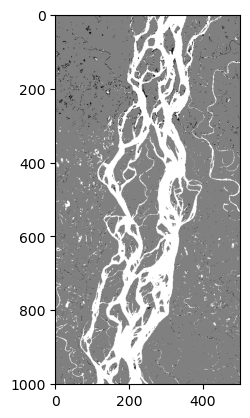

In [10]:
img_wrong_shape = gdal.Open(r'data\satellite\original\JRC_GSW1_4_MonthlyHistory_training_r1\1989_11_01_training_r1.tif')
img_wrong_shape_array = img_wrong_shape.ReadAsArray()
plt.imshow(img_wrong_shape_array, vmin=vmin, vmax=vmax)

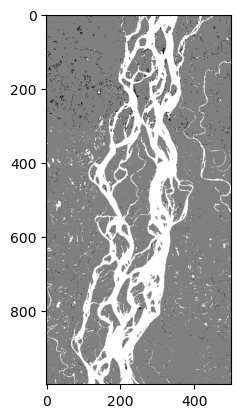

In [12]:
img_reshaped = gdal.Open(r'data\satellite\preprocessed\JRC_GSW1_4_MonthlyHistory_training_r1\1989_11_01_training_r1.tif')
img_reshaped_array = img_reshaped.ReadAsArray()
plt.imshow(img_reshaped_array, vmin=vmin, vmax=vmax)

In [13]:
print(f'Original image shape: {np.shape(img_wrong_shape_array)}\n\
Reshaped image shape: {np.shape(img_reshaped_array)}')

Original image shape: (1001, 501)
Reshaped image shape: (1000, 500)


##### 90° rotation - training reach 8

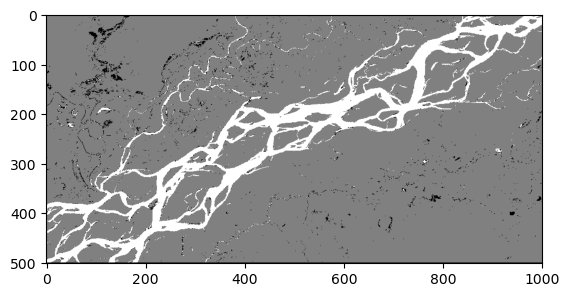

In [21]:
img_90 = gdal.Open(r'data\satellite\original\JRC_GSW1_4_MonthlyHistory_training_r8\1988_02_01_training_r8.tif')
img_array_90 = img_90.ReadAsArray()
plt.imshow(img_array_90, vmin=vmin, vmax=vmax)

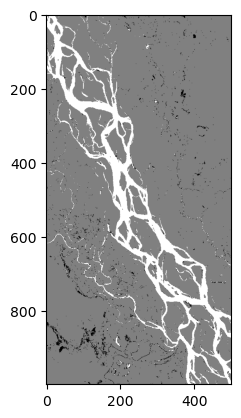

In [22]:
processed_img_90 = gdal.Open(r'data\satellite\preprocessed\JRC_GSW1_4_MonthlyHistory_training_r8\1988_02_01_training_r8.tif')
processed_img_array_90 = processed_img_90.ReadAsArray()
plt.imshow(processed_img_array_90, vmin=vmin, vmax=vmax)

##### 45° rotation - training reach 28

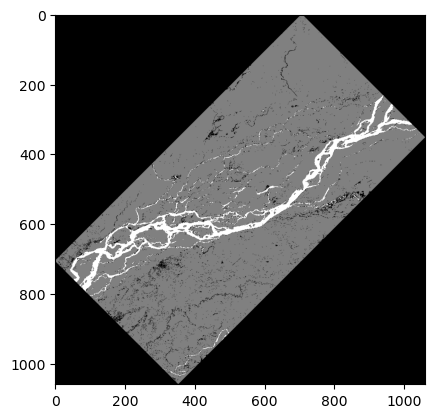

In [26]:
img_45 = gdal.Open(r'data\satellite\original\JRC_GSW1_4_MonthlyHistory_training_r28\1988_02_01_training_r28.tif')
img_array_45 = img_45.ReadAsArray()
plt.imshow(img_array_45, vmin=vmin, vmax=vmax)

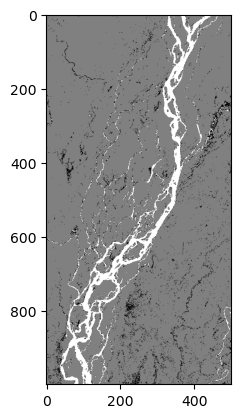

In [35]:
processed_img_45 = gdal.Open(r'data\satellite\preprocessed\JRC_GSW1_4_MonthlyHistory_training_r28\1988_02_01_training_r28.tif')
processed_img_array_45 = processed_img_45.ReadAsArray()
plt.imshow(processed_img_array_45, vmin=vmin, vmax=2)

### 3. Calculate total amount of pixels for each class 

For each reach a <code>*.csv</code> file is created to store information on total number of pixels for each class.

**<span style="color:red">Attention!</span>**
\
There is no need to run the following cells because all <code>*.csv</code> files are already generated.

**<span style="color:red">Attention 2!</span>**
\
The next cells should be run after all images are preprocessed, in order to make sure these all have the same dimension and orientation.

In [29]:
# training reaches

reach_id = 0
# initiate folders list to store folders' name
folders_training = []

for folder in os.listdir(dir_proc):
    if train in folder: # include only training reaches
        folders_training.append(folder)

# sort folders based on reach_id
folders_training.sort(key=lambda x: int(x.split(f'_{train}_r')[-1]))

for folder in folders_training:
    print(fr'Started counting pixels in folder "{folder}"...')
    reach_id += 1
    save_tot_pixels(train, reach_id) # do it for all images
    print(f'Finished counting pixels folder "{folder}"!\n')

Started counting pixels in folder "JRC_GSW1_4_MonthlyHistory_training_r1"...
Finished counting pixels folder "JRC_GSW1_4_MonthlyHistory_training_r1"!

Started counting pixels in folder "JRC_GSW1_4_MonthlyHistory_training_r2"...
Finished counting pixels folder "JRC_GSW1_4_MonthlyHistory_training_r2"!

Started counting pixels in folder "JRC_GSW1_4_MonthlyHistory_training_r3"...
Finished counting pixels folder "JRC_GSW1_4_MonthlyHistory_training_r3"!

Started counting pixels in folder "JRC_GSW1_4_MonthlyHistory_training_r4"...
Finished counting pixels folder "JRC_GSW1_4_MonthlyHistory_training_r4"!

Started counting pixels in folder "JRC_GSW1_4_MonthlyHistory_training_r5"...
Finished counting pixels folder "JRC_GSW1_4_MonthlyHistory_training_r5"!

Started counting pixels in folder "JRC_GSW1_4_MonthlyHistory_training_r6"...
Finished counting pixels folder "JRC_GSW1_4_MonthlyHistory_training_r6"!

Started counting pixels in folder "JRC_GSW1_4_MonthlyHistory_training_r7"...
Finished counting

In [12]:
# validation reaches

reach_id = 0
# initiate folders list to store folders' name
folders_validation = []

for folder in os.listdir(dir_proc):
    if val in folder: # include only validation reaches
        folders_validation.append(folder)

# sort folders based on reach_id
folders_validation.sort(key=lambda x: int(x.split(f'_{val}_r')[-1]))

for folder in folders_validation:
    print(fr'Started counting pixels in folder "{folder}"...')
    reach_id += 1
    save_tot_pixels(val, reach_id) # do it for all images
    print(f'Finished counting pixels folder "{folder}"!\n') 

Started counting pixels in folder "JRC_GSW1_4_MonthlyHistory_validation_r1"...
Finished counting pixels folder "JRC_GSW1_4_MonthlyHistory_validation_r1"!



In [13]:
# testing reaches

reach_id = 0
# initiate folders list to store folders' name
folders_testing = []

for folder in os.listdir(dir_orig):
    if test in folder: # include only testing reaches
        folders_testing.append(folder)

# sort folders based on reach_id
folders_testing.sort(key=lambda x: int(x.split(f'_{test}_r')[-1]))

for folder in folders_testing:
    print(fr'Started counting pixels in folder "{folder}"...')
    reach_id += 1
    save_tot_pixels(test, reach_id) # do it for all images
    print(f'Finished counting pixels folder "{folder}"!\n')

Started counting pixels in folder "JRC_GSW1_4_MonthlyHistory_testing_r1"...
Finished counting pixels folder "JRC_GSW1_4_MonthlyHistory_testing_r1"!



**<span style="color:red">Attention!</span>**
\
The next cells were used to compute the max values present within an image because in some of them it was found that this value was 3 and not 2 as it was expected. This happens only for reshaped images, although it seems not to occur more now it is something to be aware of.

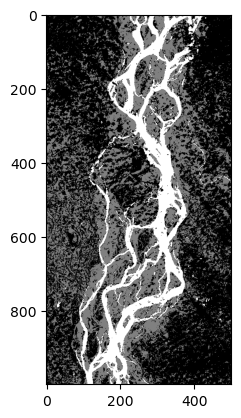

In [21]:
img_45 = gdal.Open(r'data\satellite\preprocessed\JRC_GSW1_4_MonthlyHistory_training_r1\2001_01_01_training_r1.tif')
img_array_45 = img_45.ReadAsArray()
plt.imshow(img_array_45, vmin=vmin, vmax=vmax)

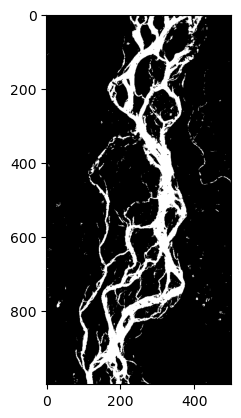

In [22]:
# should show where the max are located but is not working

max_value = np.max(img_array_45)
mask_array = np.where(img_array_45 == max_value, 1, 0)

# Plot the locations of the maximum value
plt.imshow(mask_array, cmap='gray', vmin=0, vmax=1)
plt.show()

### 4. Calculate the "average" image across a season (from January to April of the same year) 

For each reach a <code>*.csv</code> file is created to store the pixel value of the average image across a season. The average is used to replace `no-data` pixels of the imagse used in the datasets, and consequently create only binary images with two classes (`non-water` and `water`). 

**<span style="color:red">Attention!</span>**
\
The next cell was used to compute and save the season average image for al years and reaches by setting the default `window_size=15` and `replace_default=0`. There is no need to rerun the cell, unless different values are to be chosen.

In [18]:
# loop over all reaches
for use in train_val_test_list:
    if use == val or use == test:
        reach = 1
        print(f'Started exporting {use} reach {reach}')
        export_good_avg(use, 1)
        print(f'Finished exporting {use} reach {reach}\n')
    else:
        reaches = [i for i in range(1,29)] 
        for reach in reaches:
            print(f'Started exporting {use} reach {reach}')
            export_good_avg(use, reach)
            print(f'Finished exporting {use} reach {reach}\n')

Started exporting training reach 1


C:\Users\magherin\AppData\Local\Temp\ipykernel_54904\3001504526.py:21: RuntimeWarning: Mean of empty slice
  avg_season = np.nanmean(imgs, axis=0) # compute pixel-wise average


Finished exporting training reach 1

Started exporting training reach 2
Finished exporting training reach 2

Started exporting training reach 3
Finished exporting training reach 3

Started exporting training reach 4
Finished exporting training reach 4

Started exporting training reach 5
Finished exporting training reach 5

Started exporting training reach 6
Finished exporting training reach 6

Started exporting training reach 7
Finished exporting training reach 7

Started exporting training reach 8
Finished exporting training reach 8

Started exporting training reach 9
Finished exporting training reach 9

Started exporting training reach 10
Finished exporting training reach 10

Started exporting training reach 11
Finished exporting training reach 11

Started exporting training reach 12
Finished exporting training reach 12

Started exporting training reach 13
Finished exporting training reach 13

Started exporting training reach 14
Finished exporting training reach 14

Started exporting